# Evolutionary multiobjective optimization

LEAP currently directly supports one form of multiobjective optimization, NSGA-II, but there is intent to implement other common evolutionary multiobjective algorithms.

## Naive evolutionary multiobjective optimization

A naive approach to evolutionary multiobjective optimization would be to simply sum up the fitnesses, biased by a weight, as a final, single fitness, $f(x)$:

$f(x) = \sum \limits_{i=0}^n w_i f_i$

Where $f_i$ is the fitness for objective _i_.

However, there isn't very satisfying because we have to decide on $w_i$, which we usually don't know. A better approach would be to evolve solutions along a Pareto front where each solution on the front dominates other solutions.

## NSGA-II

The NSGA-II algorithm is just one such evolutionary multiobjective optimization (MO) algorithm.

Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan.
"A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II." IEEE
transactions on evolutionary computation 6, no. 2 (2002): 182-197.


In [1]:
import sys
import pandas as pd

from leap_ec.representation import Representation
from leap_ec.ops import tournament_selection, clone, evaluate, pool
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec.real_rep.ops import mutate_gaussian
from leap_ec.probe import print_individual
from leap_ec.global_vars import context

from leap_ec.multiobjective.nsga2 import generalized_nsga_2
from leap_ec.multiobjective.problems import SCHProblem

In [2]:
# These are smaller than the values used in original paper, but suffice for demonstration purposes.
POP_SIZE=50
MAX_GENERATIONS=100

We supply one of the benchmark functions, Schaffer's Study (that we refer to as the "SCHProblem"), used in Deb's original paper that uses a single gene from which we calculate two separate fitnesses.

$f_1(x) = x^2$

$f_2(x) = (x - 2)^2$

For which there are two optimal solutinos, $x \in [0,2]$

In [3]:
sch_problem = SCHProblem() # Schaffer's Study problem

In [4]:
# We're only going to do a narrow range, which is sufficient for demonstration purposes. The original
# NSGA-II paper explored a wider range.
sch_representation = Representation(initialize=create_real_vector(bounds=[(-10, 10)]))

In [5]:
def print_generation(population):
    """ Pipeline probe for echoing current generation """
    if context['leap']['generation'] % 10 == 0:
        print(f"generation: {context['leap']['generation']}")
    return population

In [6]:
pipeline = [tournament_selection, # uses domination comparison in MultiObjective.worse_than()
            clone, 
            mutate_gaussian(std=0.5, expected_num_mutations=1),
            evaluate,
#             print_individual, # only if you want to see every single new offspring
            pool(size=POP_SIZE),
            print_generation]

In [7]:
final_pop = generalized_nsga_2(max_generations=MAX_GENERATIONS, 
                   pop_size=POP_SIZE, 
                   problem=sch_problem, 
                   representation=sch_representation,
                   pipeline=pipeline)

generation: 0
generation: 10
generation: 20
generation: 30
generation: 40
generation: 50
generation: 60
generation: 70
generation: 80
generation: 90


In [8]:
df = pd.DataFrame([(x.genome[0], x.fitness[0], x.fitness[1], x.rank, x.distance) for x in final_pop])

In [9]:
df.columns = ['gene','f1','f2','rank','distance']

In [10]:
df

,gene,f1,f2,rank,distance
0,0.000241,5.789011e-08,3.999038e+00,1,inf
1,2.000610,4.002442e+00,3.726761e-07,1,inf
2,0.268178,7.191942e-02,2.999208e+00,1,0.085457
3,0.143701,2.064994e-02,3.445846e+00,1,0.083531
4,1.346674,1.813530e+00,4.268352e-01,1,0.077712
5,1.028344,1.057491e+00,9.441156e-01,1,0.071368
6,1.703751,2.902767e+00,8.776349e-02,1,0.058007
7,1.598528,2.555291e+00,1.611800e-01,1,0.056781
8,1.489717,2.219255e+00,2.603892e-01,1,0.053198
9,0.064846,4.205057e-03,3.744819e+00,1,0.051869


## Visualization of Pareto front

By plotting the two fitnesses against each other we can see the Pareto front of solutions.

<AxesSubplot:xlabel='f1', ylabel='f2'>

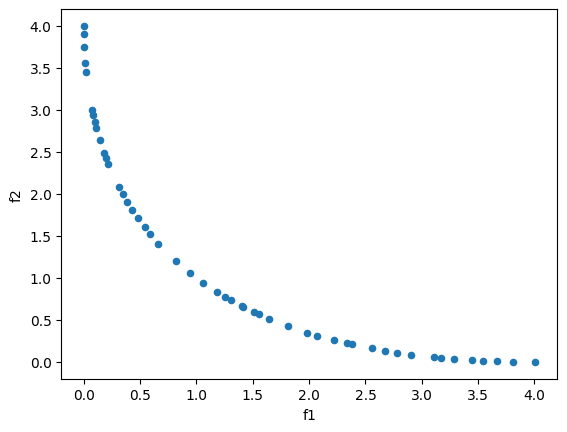

In [11]:
df.plot(x='f1',y='f2', kind='scatter')